In [1]:
from feynml import FeynmanDiagram, Leg, Propagator, Vertex, PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points,auto_grid,auto_align
import numpy as np
import pyfeyn2
print(pyfeyn2.__version__)

2.3.3.30


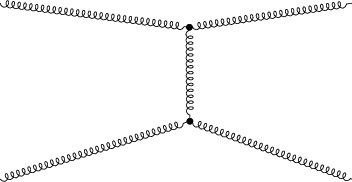

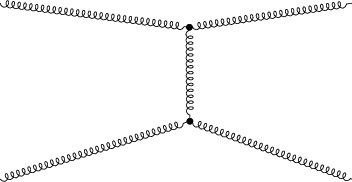

In [2]:
v1 = Vertex("v1").with_shape("dot")
v2 = Vertex("v2").with_style("symbol : dot")

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(name="g").connect(v1, v2),
    Leg(name="g").with_target(v1).with_xy(-2, 1).with_incoming(),
    Leg(name="g").with_target(v2).with_xy(-2, -1).with_incoming().with_class("notred"),
    Leg(name="g").with_target(v1).with_xy(2, 1).with_outgoing().with_class("red"),
    Leg("myid1",name="g").with_target(v2).with_xy(2, -1).with_outgoing()
)
fd = feynman_adjust_points(fd,size=10)
tfd = TikzFeynmanRender(fd)
tfd.render()

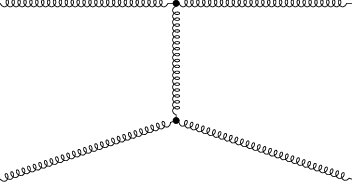

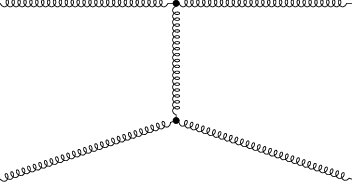

In [3]:
fd = auto_grid(fd,n_x=3,n_y=4)
tfd = TikzFeynmanRender(fd)
tfd.render()

In [4]:
fd.get_bounding_box()

(1.068721701916517, 0.5582087700800099, 10.0, 5.023878930720089)

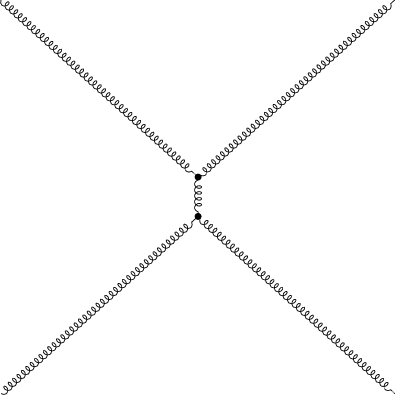

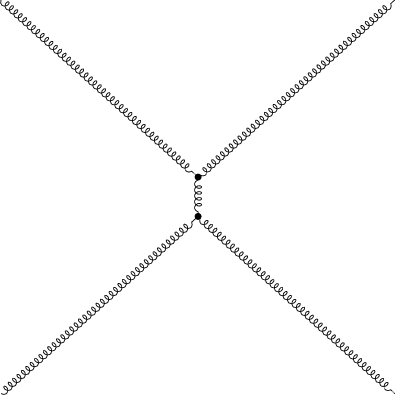

In [5]:
fd = auto_align(fd,np.array([[0,0],[1,0],[1,1],[0,1],[0.5,0.45],[0.5,0.55]])*10)
tfd = TikzFeynmanRender(fd)
tfd.render()